# Image De-PhotoBombing via DeepFillv2

## Paper: [Free-Form Image Inpainting with Gated Convolution](https://arxiv.org/abs/1806.03589)
## Repo [Github](https://github.com/JiahuiYu/generative_inpainting)

In [1]:
!git clone https://github.com/Alani20220202/generative_inpainting
%cd generative_inpainting

Cloning into 'generative_inpainting'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 216 (delta 6), reused 14 (delta 3), pack-reused 193
Receiving objects: 100% (216/216), 14.09 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/kaggle/working/generative_inpainting


In [2]:
!pip install -q tensorflow==1.15.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 1.15.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 1.15.0 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow 1.15.0 which is incompatible.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow<2.7.0,>=2.6.0, but you have tensorflow 1.15.0 which is incompatible.
tensorflow-decision-forests 0.2.0 requires tensorf

In [3]:
# Install tensorflow toolkit neuralgym
!pip install git+https://github.com/JiahuiYu/neuralgym

  Cloning https://github.com/JiahuiYu/neuralgym to /tmp/pip-req-build-ed9ti25b
  Running command git clone --filter=blob:none --quiet https://github.com/JiahuiYu/neuralgym /tmp/pip-req-build-ed9ti25b
  Resolved https://github.com/JiahuiYu/neuralgym to commit 88292adb524186693a32404c0cfdc790426ea441
  Preparing metadata (setup.py) ... done
  Created wheel for neuralgym: filename=neuralgym-0.0.1-py3-none-any.whl size=40442 sha256=9240c6dc800e10286ef874b23b2169f127a535a94fcdc35211b34843ac9fcaf4
  Stored in directory: /tmp/pip-ephem-wheel-cache-zvys2or1/wheels/bf/3a/34/026a730c199a8c4cb5da3c052c71801eaf6618c4771d7faab2
Successfully built neuralgym


## Download a pretrained model

In [4]:
!mkdir checkpoints
!cp -rf /kaggle/input/deepfill-v2-pretrained/places2_256_deepfill_v2 checkpoints

## Raw Image

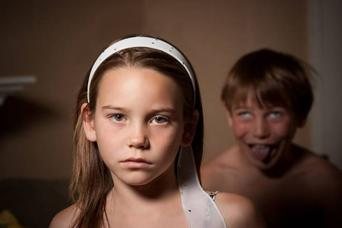

In [8]:
from IPython.display import Image
Image('/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/117.jpg')

## Resizing Mask and Input (Raw) Image

In [6]:
import cv2
import os
input_image = cv2.imread("/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/117.jpg")
mask = cv2.imread("/kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/mask/117.jpg", cv2.IMREAD_GRAYSCALE)
assert mask is not None, "Mask file not found or could not be loaded."
mask = cv2.resize(mask, (input_image.shape[1], input_image.shape[0]))
output_directory = "/kaggle/working"
output_mask_path = os.path.join(output_directory, "resized_mask.jpg")
cv2.imwrite(output_mask_path, mask)
!python test.py --image /kaggle/input/image-de-photobombing-benchmark-dpd-300-dataset/dataset/117.jpg \
--mask /kaggle/working/resized_mask.jpg \
--output /kaggle/working/117_output.jpg \
--checkpoint_dir checkpoints/places2_256_deepfill_v2


---------------------------------- APP CONFIG ----------------------------------
num_gpus_per_job: 1
num_cpus_per_job: 4
num_hosts_per_job: 1
memory_per_job: 32
gpu_type: nvidia-tesla-p100
name: places2_gated_conv_v100
model_restore: 
dataset: celebahq
random_crop: False
val: False
log_dir: logs/full_model_celeba_hq_256
gan: sngan
gan_loss_alpha: 1
gan_with_mask: True
discounted_mask: True
random_seed: False
padding: SAME
train_spe: 4000
max_iters: 100000000
viz_max_out: 10
val_psteps: 2000
data_flist: 
  celebahq: ['data/celeba_hq/train_shuffled.flist', 'data/celeba_hq/validation_static_view.flist']
  celeba: ['data/celeba/train_shuffled.flist', 'data/celeba/validation_static_view.flist']
  places2: ['data/places2/train_shuffled.flist', 'data/places2/validation_static_view.flist']
  imagenet: ['data/imagenet/train_shuffled.flist', 'data/imagenet/validation_static_view.flist']
static_view_size: 30
img_shapes: [256, 256, 3]
height: 128
width: 128
max_delta_height: 32
max_delta_width: 32

## Display Result

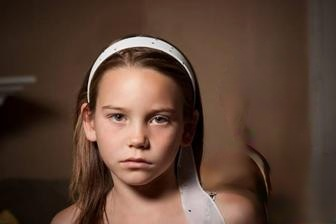

In [7]:
Image('/kaggle/working/117_output.jpg')